# **Bike Sharing Assignment**
*Assignment Solution by Vikas Mestry*

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

### Business Use Case

The business requires us to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = LinearRegression()
scaler = MinMaxScaler()




In [2]:
# Load the dataset into pandas dataframe

bikeSharingData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')

In [3]:
# Check first few records of the loaded dataset
bikeSharingData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check for null values in the dataset

bikeSharingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Convert numerical variables into categorical

bikeSharingData.loc[(bikeSharingData['season'] == 1), 'season'] = 'spring'
bikeSharingData.loc[(bikeSharingData['season'] == 2), 'season'] = 'summer'
bikeSharingData.loc[(bikeSharingData['season'] == 3), 'season'] = 'fall'
bikeSharingData.loc[(bikeSharingData['season'] == 4), 'season'] = 'winter'

In [6]:
bikeSharingData['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [7]:
# categorizing months from numeric values

bikeSharingData[['mnth']] = bikeSharingData[['mnth']].apply(lambda x : x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'}))


bikeSharingData['mnth'].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [8]:
# categorizing weekdays from numeric values

bikeSharingData[['weekday']] = bikeSharingData[['weekday']].apply(lambda x : x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}))

bikeSharingData['weekday'].astype('category').value_counts()

Mon      105
Tues     105
Wed      105
Sat      104
Sun      104
Thurs    104
Fri      103
Name: weekday, dtype: int64

In [9]:
# Converting weathersit values to string representation.

bikeSharingData.loc[(bikeSharingData['weathersit'] == 1), 'weathersit'] = 'A'
bikeSharingData.loc[(bikeSharingData['weathersit'] == 2), 'weathersit'] = 'B'
bikeSharingData.loc[(bikeSharingData['weathersit'] == 3), 'weathersit'] = 'C'
bikeSharingData.loc[(bikeSharingData['weathersit'] == 4), 'weathersit'] = 'D'

bikeSharingData['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [10]:
bikeSharingData = bikeSharingData.drop(['instant','dteday', 'casual','registered'], axis=1, inplace=False)

## Exploratory Data Analysis

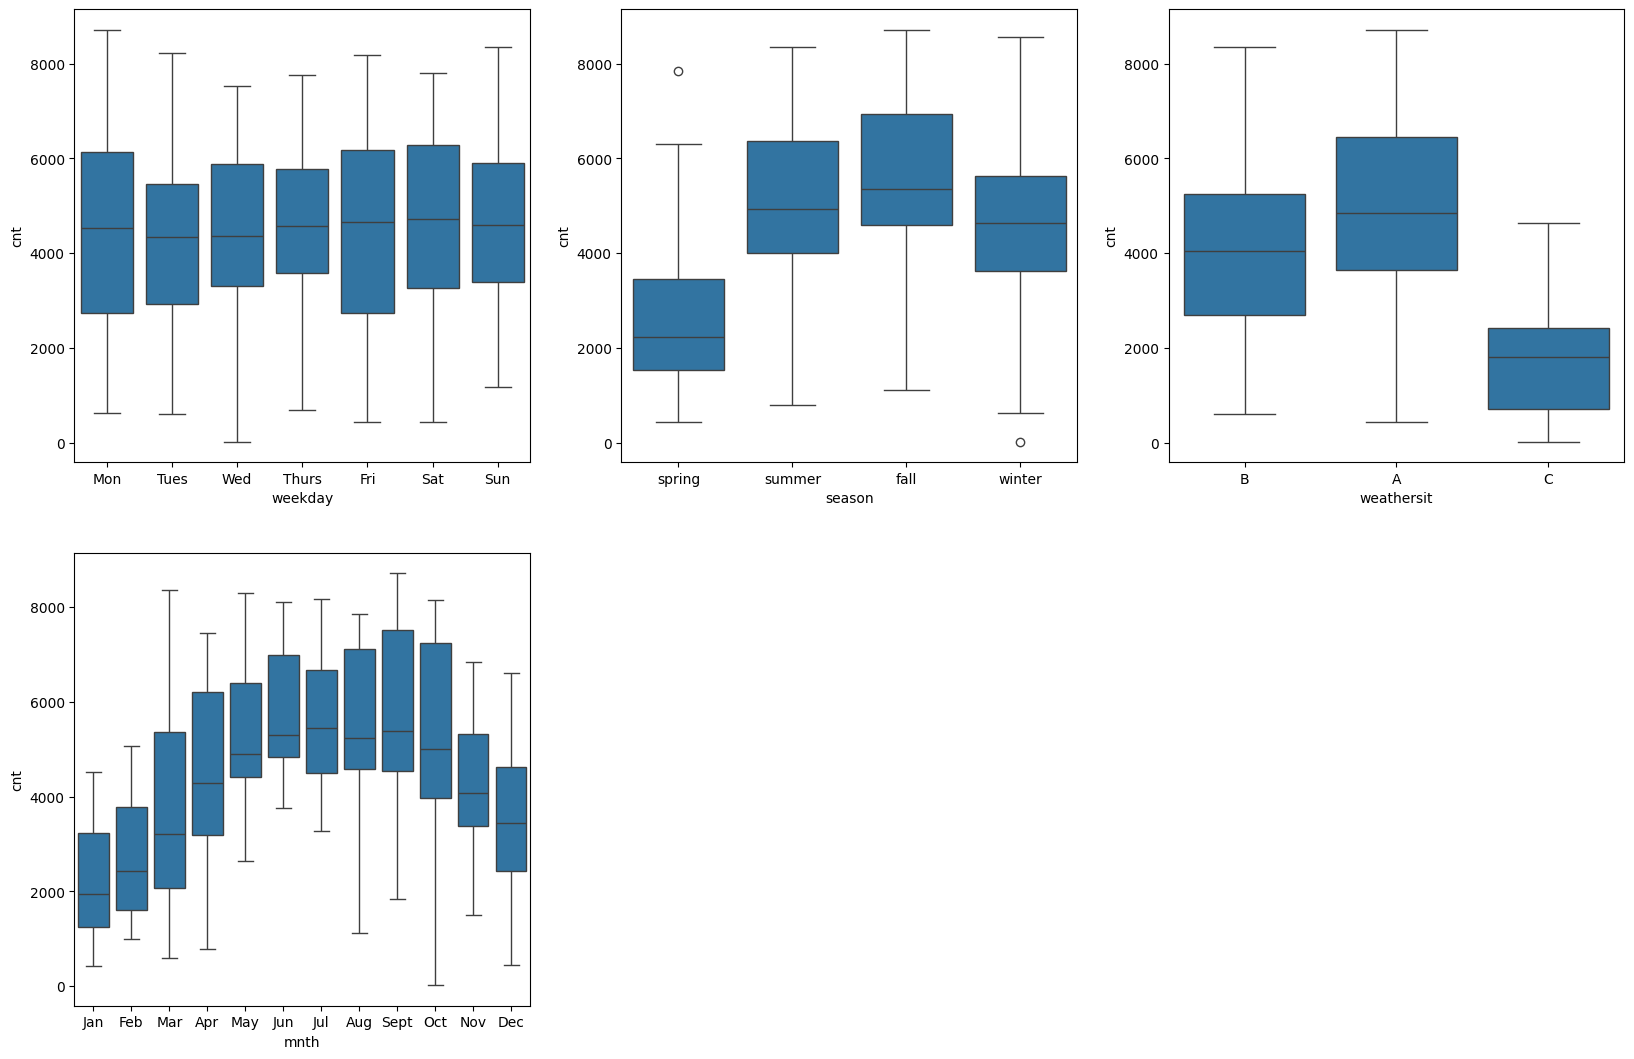

In [11]:
# Categorical data analysis

plt.figure(figsize=(20, 20))
plt.subplot(3, 3, 1)
sns.boxplot(x ='weekday', y ='cnt', data = bikeSharingData)

plt.subplot(3, 3, 2)
sns.boxplot(x ='season', y ='cnt', data = bikeSharingData)

plt.subplot(3, 3, 3)
sns.boxplot(x ='weathersit', y ='cnt', data = bikeSharingData)

plt.subplot(3, 3, 4)
sns.boxplot(x ='mnth', y ='cnt', data = bikeSharingData)
plt.show()

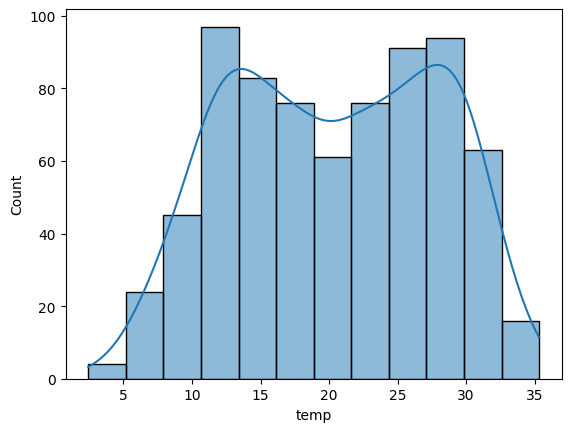

In [12]:
sns.histplot(bikeSharingData['temp'], kde=True)
plt.show()

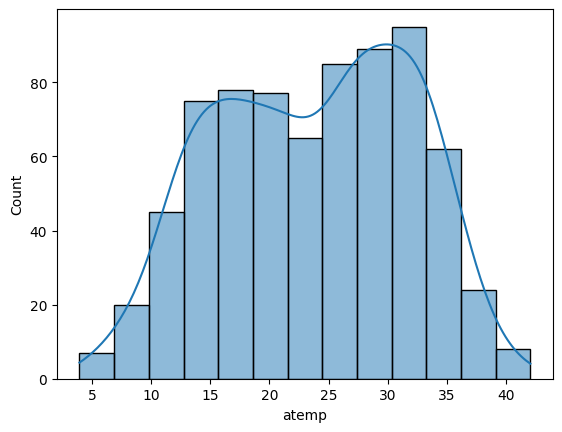

In [13]:
sns.histplot(bikeSharingData['atemp'], kde=True)
plt.show()

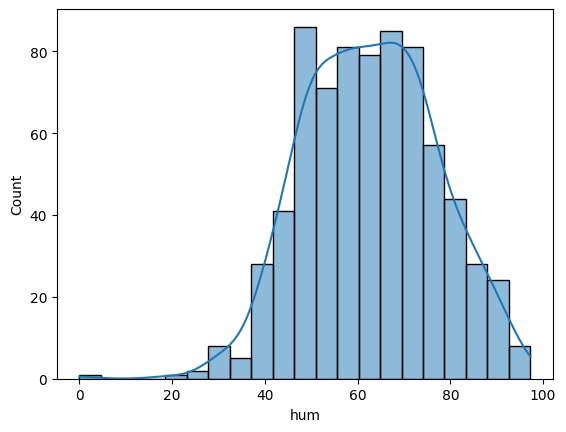

In [14]:
sns.histplot(bikeSharingData['hum'], kde=True)
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different months')]

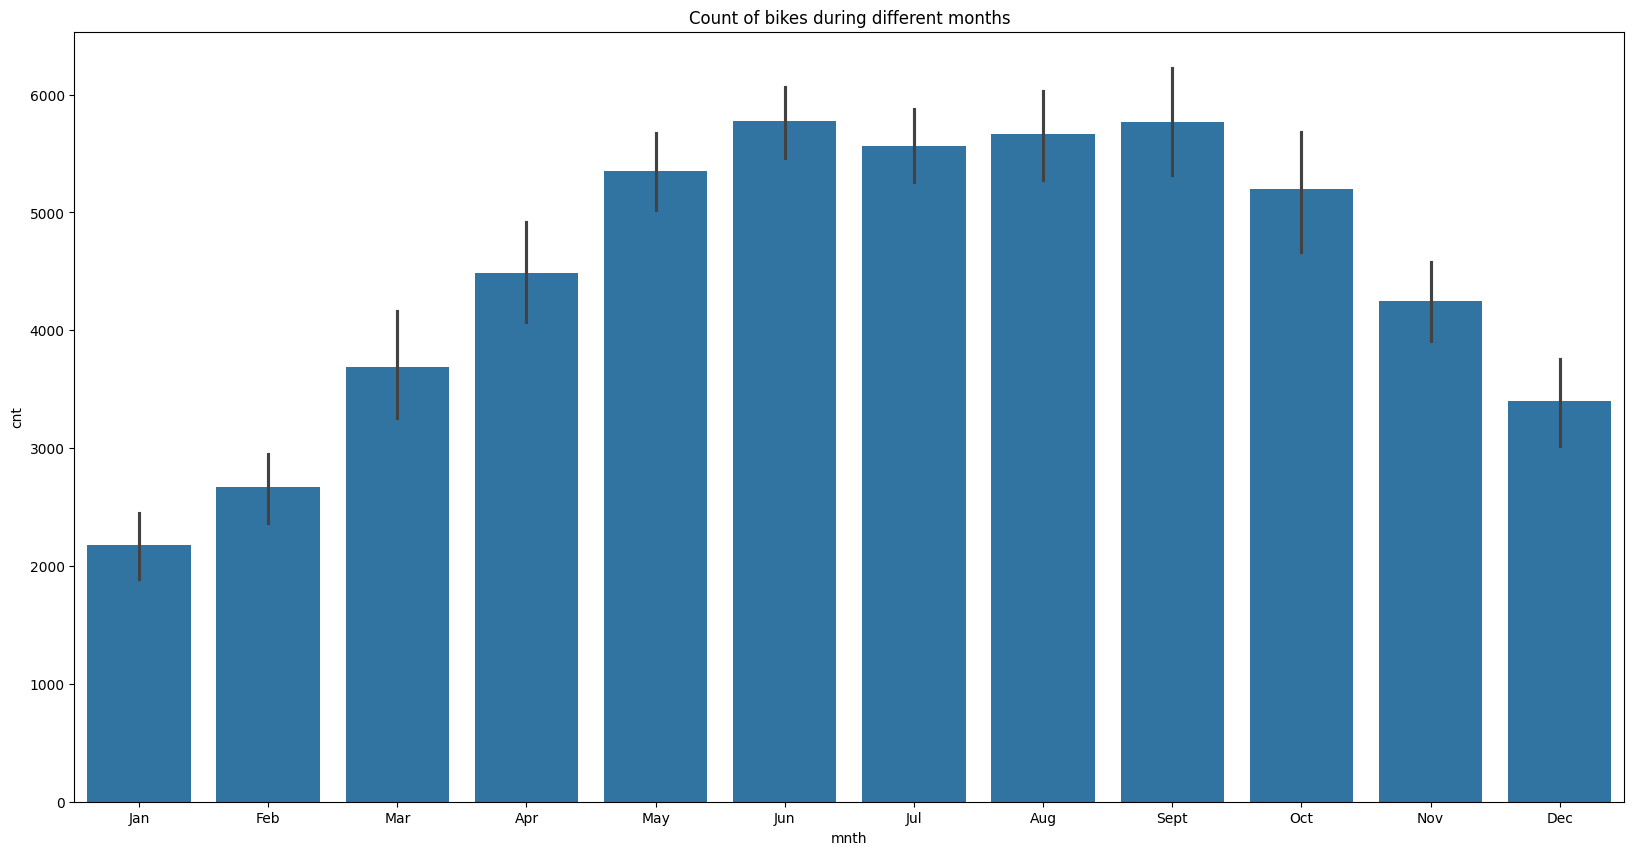

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bikeSharingData, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

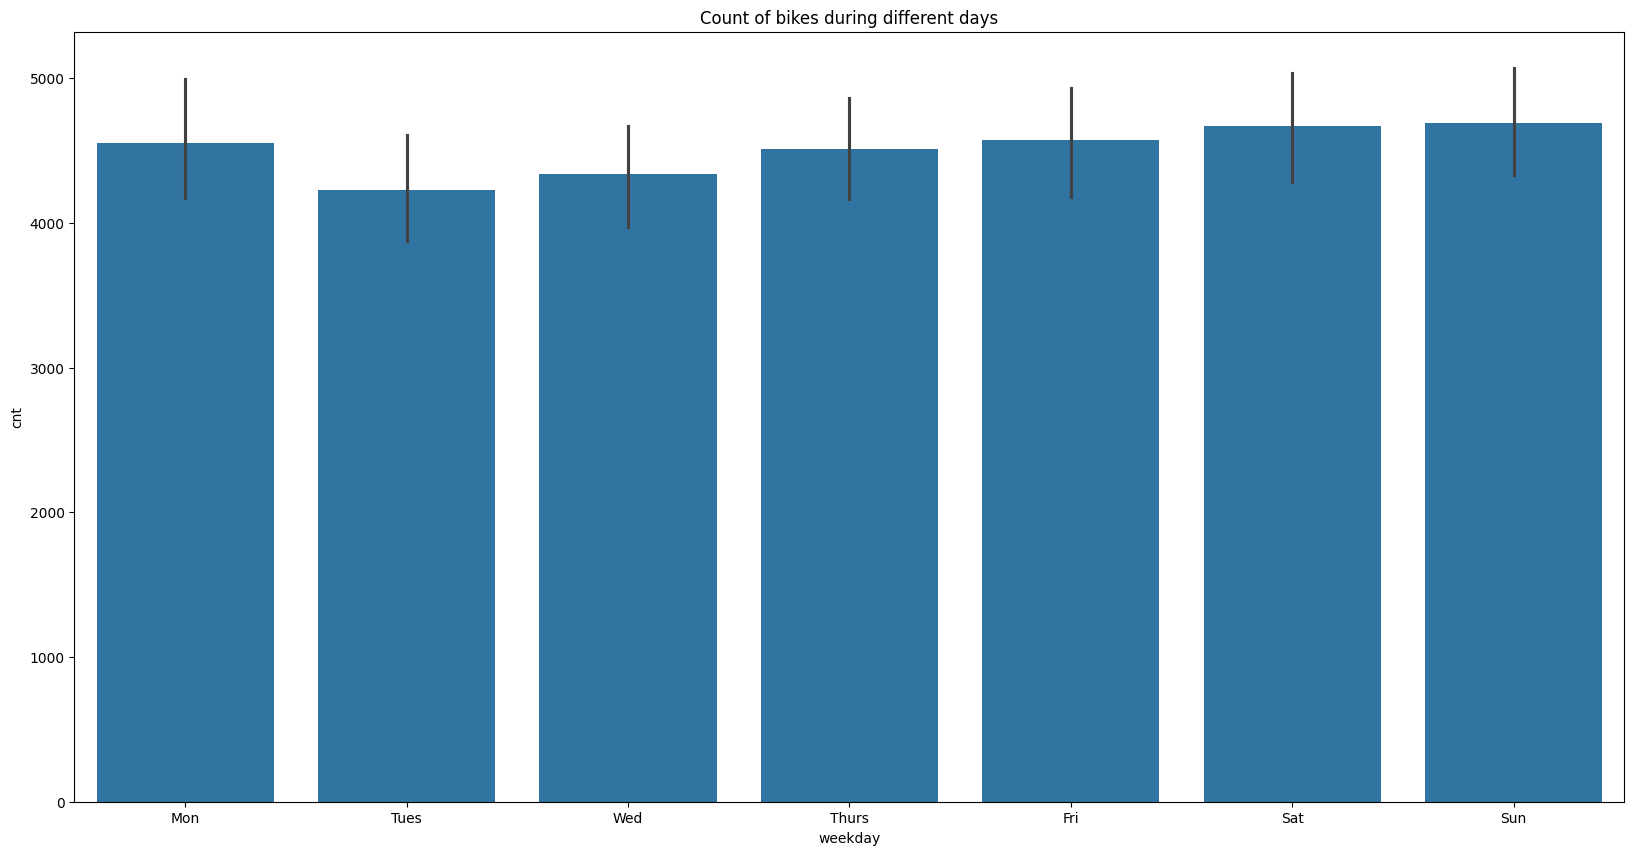

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bikeSharingData, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

In [17]:
# get all the numeric data types

bikeSharingDataNumeric = bikeSharingData.select_dtypes(include=['float64'])
bikeSharingDataNumeric.head()

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113
2,8.050924,9.47025,43.7273,16.636703
3,8.200000,10.60610,59.0435,10.739832
4,9.305237,11.46350,43.6957,12.522300


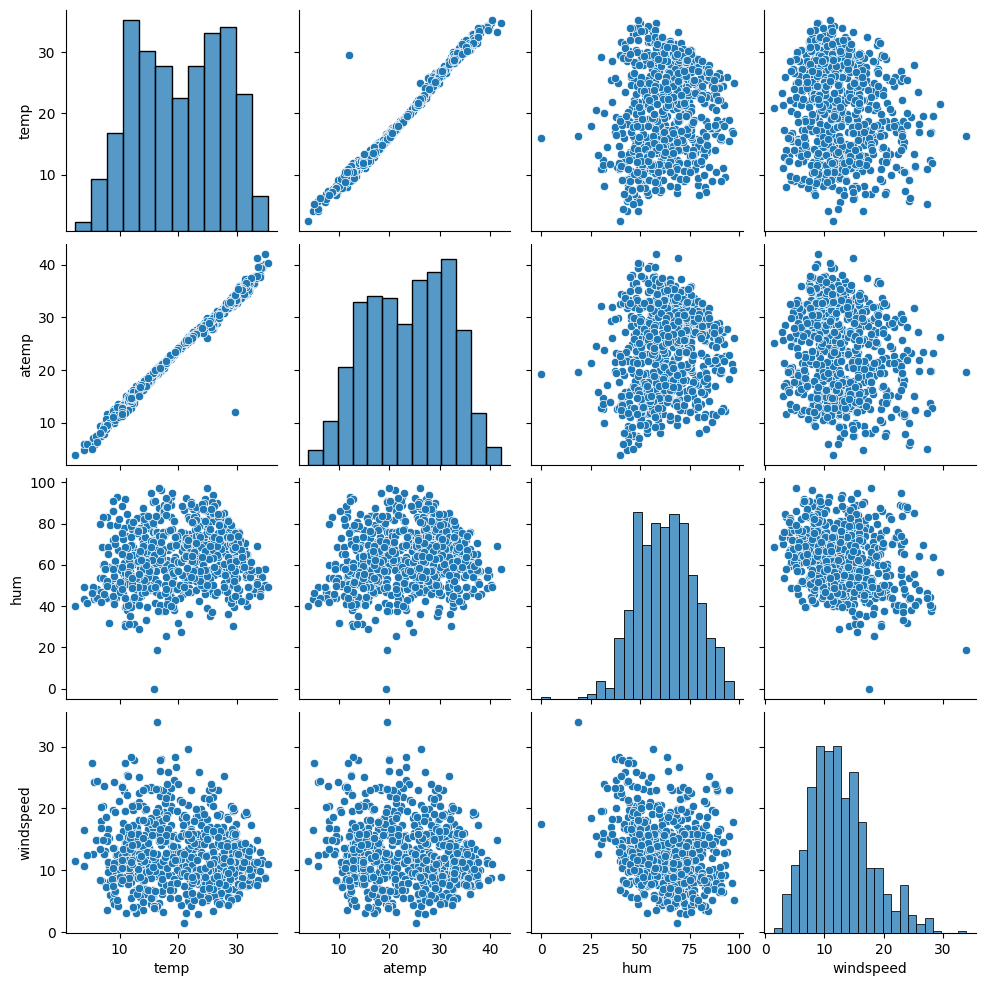

In [18]:
# pair plot

sns.pairplot(bikeSharingDataNumeric)
plt.show()

<Axes: >

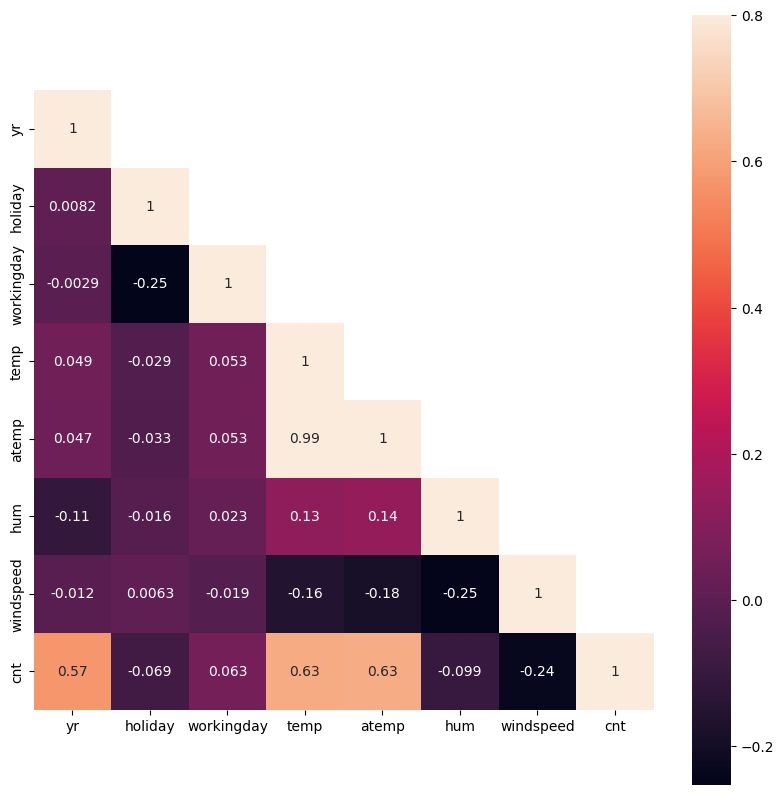

In [19]:
# heatmap
cor = bikeSharingData.corr(numeric_only=True)
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [20]:
# Dropping atemp as it is highly correlated with temp

bikeSharingData.drop('atemp', axis=1, inplace=True)

In [21]:
bikeSharingCategories = bikeSharingData.select_dtypes(include=['object'])
bikeSharingCategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 22.9+ KB


## Creating Dummy Variables

In [22]:
bikeSharingDummyVars = pd.get_dummies(bikeSharingCategories, drop_first=True)
bikeSharingDummyVars.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# drop the categorical variables

bikeSharingData = bikeSharingData.drop(list(bikeSharingCategories.columns), axis = 1)
bikeSharingData = pd.concat([bikeSharingData, bikeSharingDummyVars], axis = 1)

bikeSharingData.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [24]:
np.random.seed(0)
bs_train, bs_test = train_test_split(bikeSharingData, train_size = 0.70, test_size = 0.30, random_state = 50)

bs_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
707,1,0,0,15.750847,90.5417,10.584325,3228,0,0,1,...,0,0,0,0,0,0,1,0,1,0
172,0,0,1,30.066653,70.7500,11.541554,4507,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,9.566653,49.8750,10.583521,1248,1,0,0,...,0,0,1,0,0,0,0,0,1,0
204,0,0,0,34.030000,55.0833,11.334457,3606,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,30.271653,44.4583,7.709154,5119,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,13.495847,59.4583,14.791925,2132,1,0,0,...,0,0,1,0,0,0,0,0,0,0
132,0,0,1,21.012500,86.3333,12.041575,4105,0,1,0,...,0,0,0,0,1,0,0,0,1,0
289,0,0,1,21.900847,57.9583,11.750393,4570,0,0,1,...,1,0,0,0,0,0,0,1,0,0
109,0,0,1,24.395000,61.4167,16.208975,3944,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
var = ['temp', 'hum', 'windspeed','cnt']

bs_train[var] = scaler.fit_transform(bs_train[var])

bs_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
707,1,0,0,0.417140,0.933018,0.243629,0.368845,0,0,1,...,0,0,0,0,0,0,1,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,0.141049,1,0,0,...,0,0,1,0,0,0,0,0,1,0
204,0,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0.346555,0.612709,0.379542,0.242752,1,0,0,...,0,0,1,0,0,0,0,0,0,0
132,0,0,1,0.581838,0.889652,0.290701,0.469742,0,1,0,...,0,0,0,0,1,0,0,0,1,0
289,0,0,1,0.609645,0.597251,0.281295,0.523240,0,0,1,...,1,0,0,0,0,0,0,1,0,0
109,0,0,1,0.687715,0.632890,0.425316,0.451220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


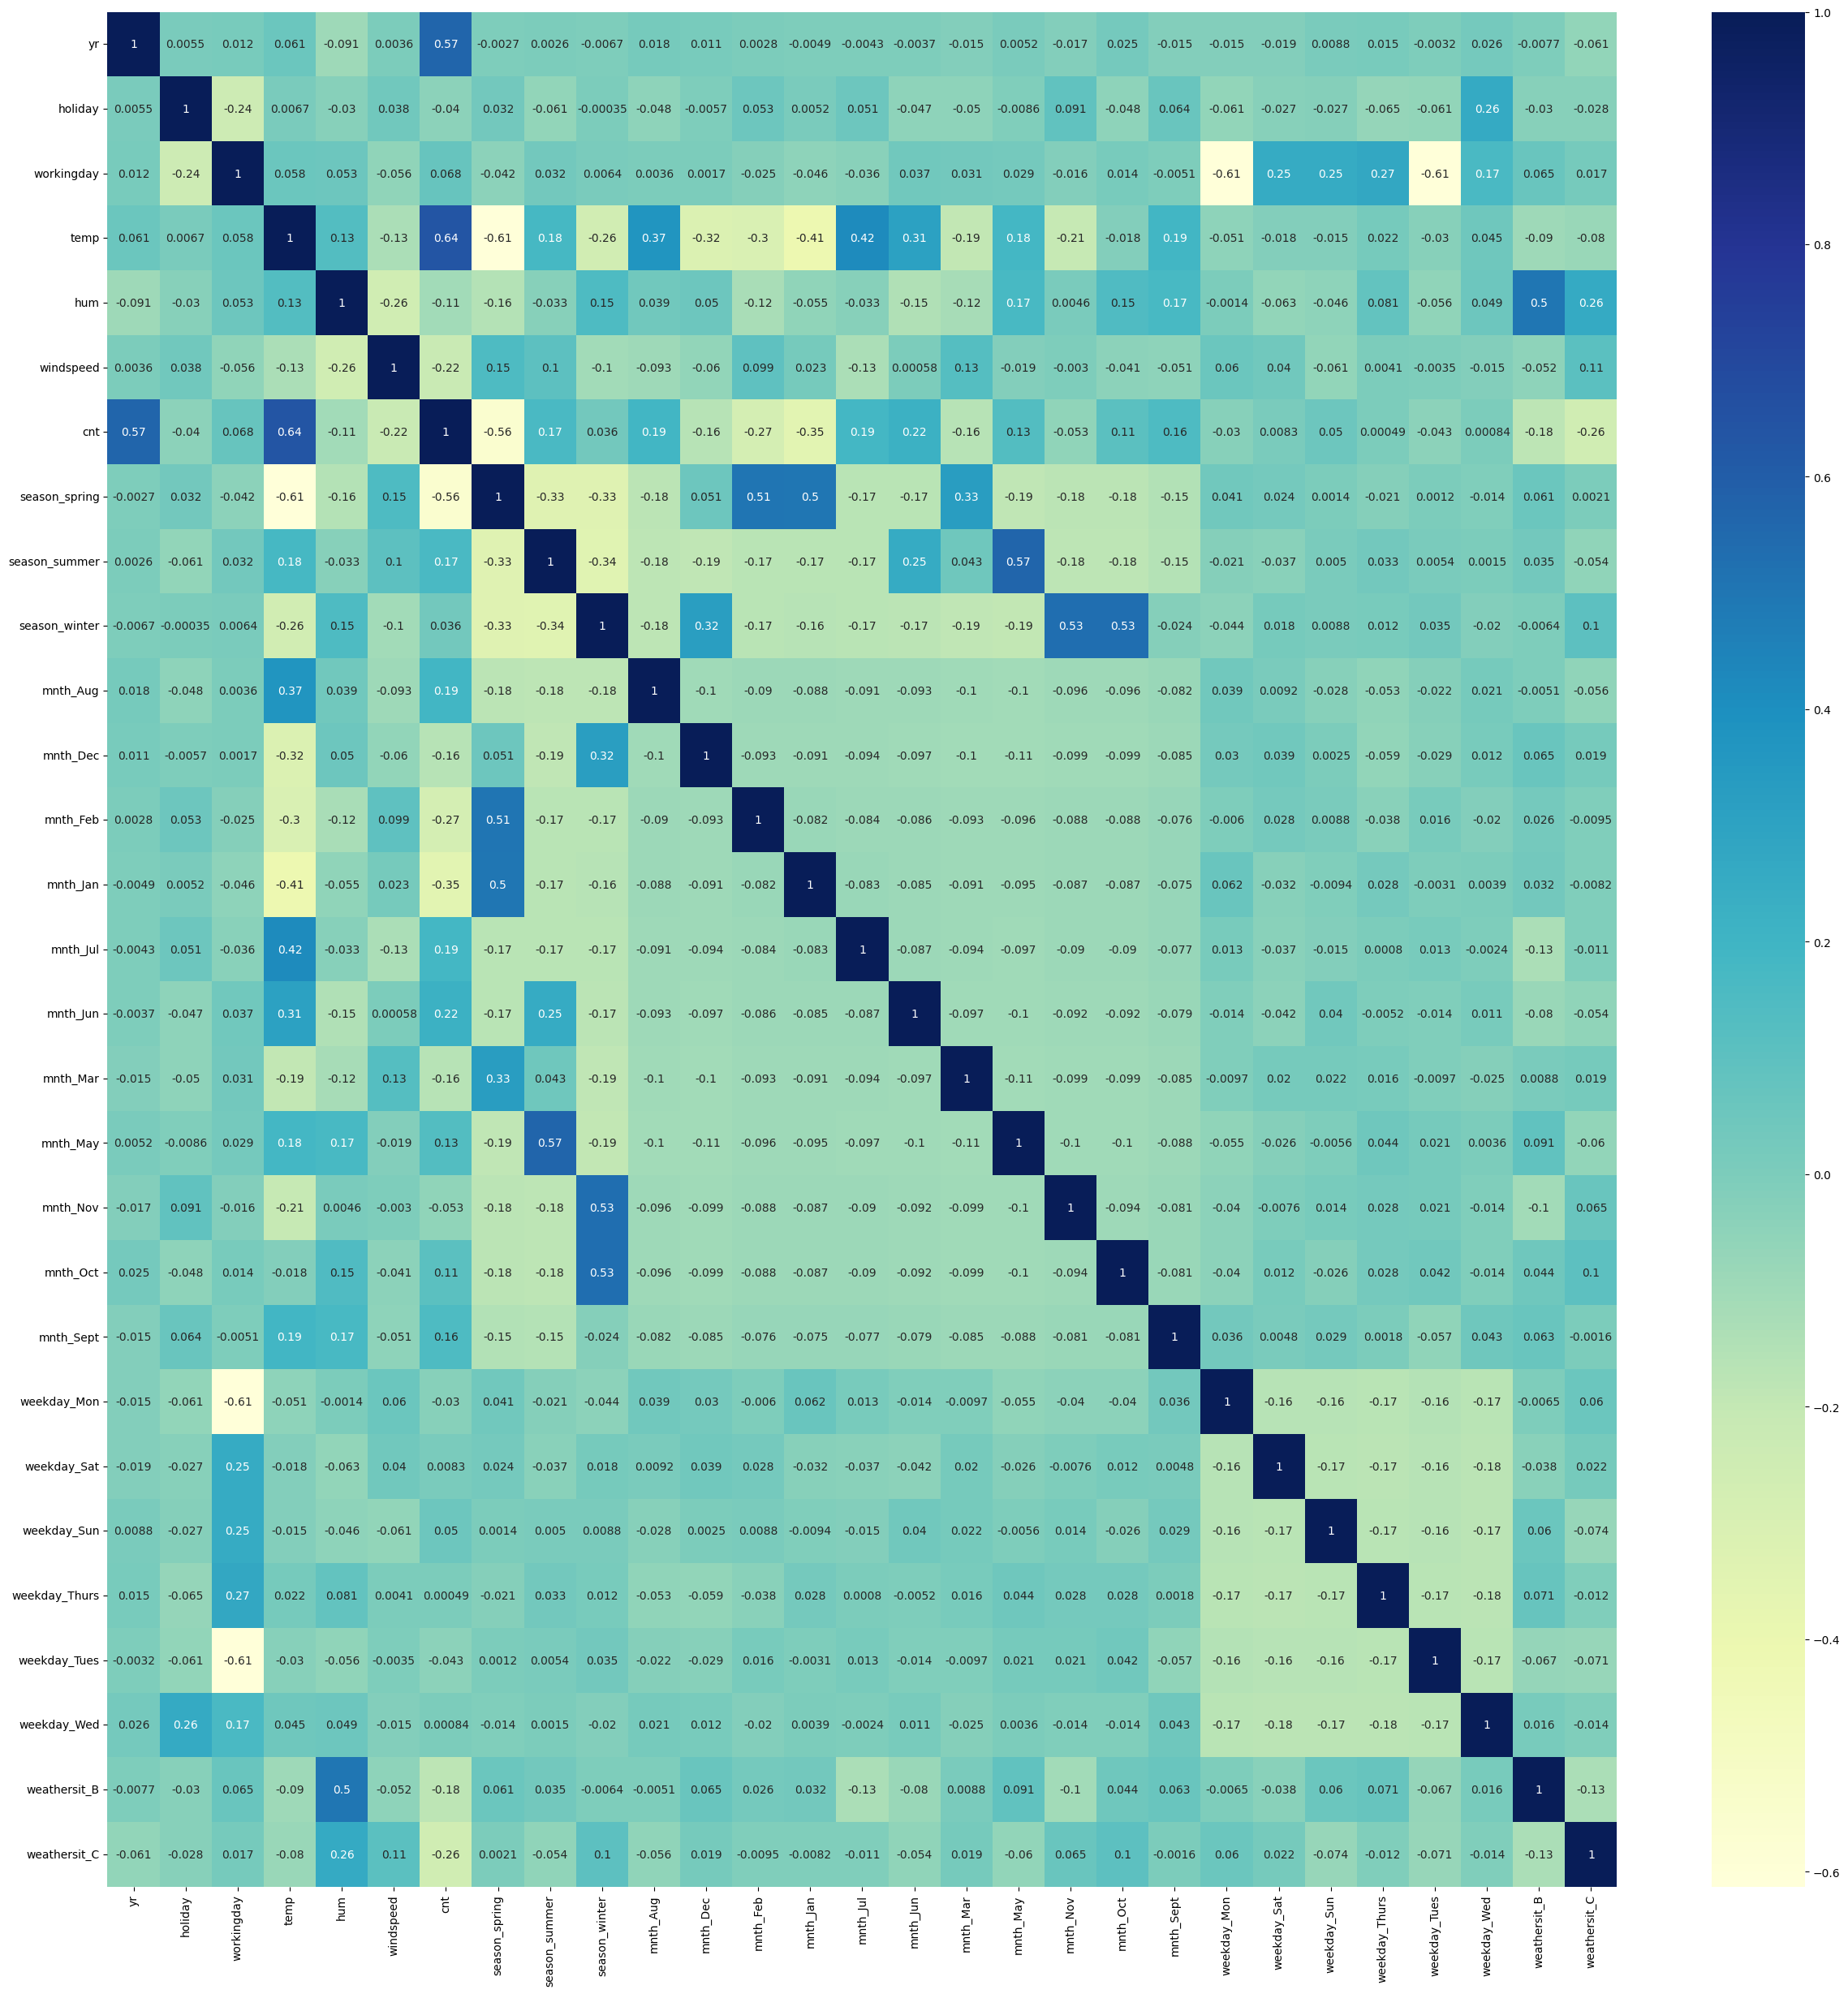

In [26]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(bs_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

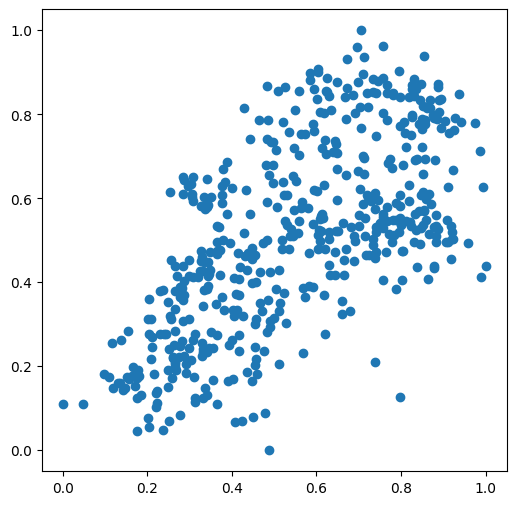

In [27]:
# based on the above heatmap we observe that temp is correlated to cnt, hence we are creating a pairplot to understand this further

plt.figure(figsize=[6,6])
plt.scatter(bs_train.temp, bs_train.cnt)
plt.show()

In [28]:
# Building model based on X & y

y_train = bs_train.pop('cnt')
X_train = bs_train

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
#  convert all the features into array before fitting the model
np.asarray(bs_train)

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [30]:
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.277368
yr               0.232662
holiday          0.039635
workingday       0.087396
temp             0.449226
hum             -0.201059
windspeed       -0.191260
season_spring   -0.064998
season_summer    0.023589
season_winter    0.121570
mnth_Aug        -0.005329
mnth_Dec        -0.071399
mnth_Feb        -0.034320
mnth_Jan        -0.059579
mnth_Jul        -0.026843
mnth_Jun         0.018478
mnth_Mar        -0.001068
mnth_May         0.027285
mnth_Nov        -0.075192
mnth_Oct        -0.014361
mnth_Sept        0.059717
weekday_Mon      0.102564
weekday_Sat      0.008141
weekday_Sun      0.008273
weekday_Thurs   -0.012980
weekday_Tues     0.047773
weekday_Wed     -0.017542
weathersit_B    -0.046850
weathersit_C    -0.212407
dtype: float64

In [31]:
# printing the coef and intercept
lm.fit(X_train, y_train)

print(lm.coef_)
print(lm.intercept_)

[ 2.32861684e-01 -8.43734748e+11 -8.43734748e+11  4.49675610e-01
 -2.01429996e-01 -1.91751812e-01 -6.53799569e-02  2.34176287e-02
  1.21582987e-01 -5.98158820e-03 -7.14853652e-02 -3.41715403e-02
 -5.94054637e-02 -2.71537147e-02  1.78108859e-02 -9.62577963e-04
  2.70696993e-02 -7.55615234e-02 -1.48315430e-02  5.93414307e-02
 -8.43734748e+11  8.02612305e-03  8.27026367e-03 -1.29089355e-02
 -8.43734748e+11 -1.77307129e-02 -4.65850830e-02 -2.12402344e-01]
843734747621.986


In [32]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.70e-184
Time:                        12:38:18   Log-Likelihood:                 536.82
No. Observations:                 510   AIC:                            -1018.
Df Residuals:                     482   BIC:                            -899.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2774      0.036      7.770      0.000       0.207       0.348
yr                0.2327      0.008     29.469      0.000       0.217       0.248
holiday           0.0396      0.024      1.628      0.104      -0.008       0.087
workingday        0.0874      0.012      7.084      0.000       0.063       0.112
temp              0.4492      0.046      9.844      0.000       0.360       0.539
hum              -0.2011      0.038     -5.236      0.000      -0.277      -0.126
windspeed        -0.1913      0.026     -7.470      0.000      -0.242      -0.141
season_spring    -0.0650      0.030     -2.176      0.030      -0.124      -0.006
season_summer     0.0236      0.025      0.947      0.344      -0.025       0.073
season_winter     0.1216      0.029      4.141      0.000       0.064       0.179
mnth_Aug         -0.0053      0.033     -0.163      0.871      -0.070       0.059
mnth_Dec         -0.0714      0.034     -2.090      0.037      -0.139      -0.004
mnth_Feb         -0.0343      0.033     -1.042      0.298      -0.099       0.030
mnth_Jan         -0.0596      0.035     -1.723      0.086      -0.128       0.008
mnth_Jul         -0.0268      0.034     -0.792      0.429      -0.093       0.040
mnth_Jun          0.0185      0.024      0.767      0.443      -0.029       0.066
mnth_Mar         -0.0011      0.026     -0.041      0.967      -0.052       0.050
mnth_May          0.0273      0.020      1.368      0.172      -0.012       0.066
mnth_Nov         -0.0752      0.037     -2.040      0.042      -0.148      -0.003
mnth_Oct         -0.0144      0.036     -0.402      0.688      -0.084       0.056
mnth_Sept         0.0597      0.032      1.891      0.059      -0.002       0.122
weekday_Mon       0.1026      0.014      7.328      0.000       0.075       0.130
weekday_Sat       0.0081      0.015      0.559      0.576      -0.020       0.037
weekday_Sun       0.0083      0.015      0.563      0.574      -0.021       0.037
weekday_Thurs    -0.0130      0.015     -0.894      0.372      -0.041       0.016
weekday_Tues      0.0478      0.014      3.500      0.001       0.021       0.075
weekday_Wed      -0.0175      0.015     -1.202      0.230      -0.046       0.011
weathersit_B     -0.0469      0.011     -4.431      0.000      -0.068      -0.026
weathersit_C     -0.2124      0.026     -8.292      0.000      -0.263      -0.162
==============================================================================
Omnibus:                       92.144   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.842
Skew:                          -0.846   Prob(JB):                     1.71e-61
Kurtosis:                       6.210   Cond. No.                     7.52e+15
================================================================

## Using Stats Model

In [33]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
# The training part of the first sequence => X_train => firstSeq
def calculate_vif(firstSeq, cols):
    df1 = firstSeq[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF',ascending=False))

We start the model building by using 15 variables and gradually decrease the variables based on the P-Value & r2

In [34]:
rfe_val = RFE(lm, step = 15)

rfe_val.fit(X_train, y_train)

print(rfe_val.support_)
print(rfe_val.ranking_)

[ True  True  True  True  True  True  True False  True False  True False
  True False False False False  True False False  True False False False
  True False False  True]
[1 1 1 1 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1]


In [35]:
# Subset the features selected by rfe1
col1 = X_train.columns[rfe_val.support_]
print(col1)

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'weekday_Mon', 'weekday_Tues', 'weathersit_C'],
      dtype='object')


,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,weekday_Mon,weekday_Tues,weathersit_C
707,1.0,1,0,0,0.417140,0.933018,0.243629,0,1,1,0,0,0,1,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0
14,1.0,0,0,0,0.223565,0.513954,0.243603,1,0,0,1,0,1,0,0
204,1.0,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,1,0
182,1.0,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,1,0,0


In [36]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())
print("_____________________________________________________________________________________________________")
calculate_vif(X_train_rfe1, col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.07e-187
Time:                        12:38:18   Log-Likelihood:                 507.64
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     496   BIC:                            -928.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3245      0.026     12.699

Removing workingday from the variable list as it seems to have a high VIF value

In [37]:
# Subset the features selected by rfe1
col1 = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'weekday_Mon', 'weekday_Tues', 'weathersit_C']
print(col1)

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'weekday_Mon', 'weekday_Tues', 'weathersit_C']


,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,weekday_Mon,weekday_Tues,weathersit_C
707,1.0,1,0,0.417140,0.933018,0.243629,0,1,1,0,0,0,1,0
172,1.0,0,0,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0
14,1.0,0,0,0.223565,0.513954,0.243603,1,0,0,1,0,1,0,0
204,1.0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,0,1,0
182,1.0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,1,0,0


In [38]:
# Fitting the model with  variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())
print("_____________________________________________________________________________________________________")
calculate_vif(X_train_rfe1, col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.07e-187
Time:                        12:38:18   Log-Likelihood:                 507.64
No. Observations:                 510   AIC:                            -987.3
Df Residuals:                     496   BIC:                            -928.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4236      0.031     13.600

Re-running after removing the variable weekday_Mon as it seems to have high P-Value

In [39]:
# Subset the features selected by rfe1
col1 = ['yr', 'holiday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'weekday_Tues', 'weathersit_C']
print(col1)

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'weekday_Tues', 'weathersit_C']


,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Jan,mnth_Nov,weekday_Tues,weathersit_C
707,1.0,1,0,0.417140,0.933018,0.243629,0,1,1,0,0,1,0
172,1.0,0,0,0.865247,0.729068,0.274549,0,0,0,0,0,0,0
14,1.0,0,0,0.223565,0.513954,0.243603,1,0,0,1,0,0,0
204,1.0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,1,0
182,1.0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,0


In [40]:
# Fitting the model with  variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())
print("_____________________________________________________________________________________________________")
# calculate_vif(X_train_rfe1, col1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.85e-188
Time:                        12:38:18   Log-Likelihood:                 506.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     497   BIC:                            -932.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4271      0.031     13.737

In [41]:
# Making predictions
y_pred = lm1.predict(X_train_rfe1)
y_pred

707    0.526796
172    0.552598
14     0.179532
204    0.614118
182    0.652886
         ...   
70     0.224067
132    0.382358
289    0.565787
109    0.472743
480    0.636366
Length: 510, dtype: float64

Comparing the y_train vs y_pred to understand the spread

Text(0, 0.5, 'y_pred')

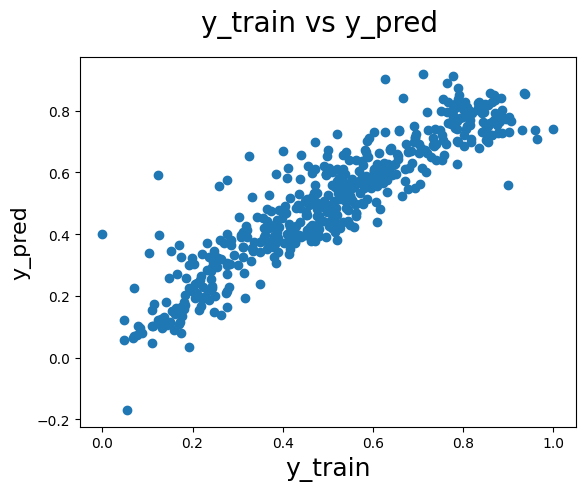

In [42]:
fig = plt.figure()
plt.scatter(y_train, y_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)